## Axelrod's Tournament

Axelrod's Tournament, proposed by political scientist Robert Axelrod in 1984, is a seminal study in evolutionary game theory. It investigates strategies for cooperation and the emergence of cooperation in repeated interactions, using the iterated prisoner's dilemma as the core game.

### Objective
The objective of Axelrod's Tournament is to explore which strategies are most effective in promoting cooperation and achieving high payoffs in repeated prisoner's dilemma interactions.

### Setup
- **Participants:** Various computer programs representing different strategies.
- **Game:** The iterated prisoner's dilemma, where two players repeatedly choose to cooperate or defect.
- **Scoring:** Participants' strategies are evaluated based on their cumulative payoff across multiple rounds of interactions.

### Key Findings
- **Tit-for-Tat:** The tournament demonstrated the effectiveness of the tit-for-tat strategy, which starts by cooperating and then mirrors the opponent's previous move.
- **Complex Strategies:** While simple strategies performed well, more sophisticated strategies that adapt to opponent behavior also achieved success.
- **Evolution of Cooperation:** Axelrod's Tournament showed that cooperation can emerge and persist in competitive environments through the adoption of reciprocal and forgiving strategies.

### Significance
- Axelrod's Tournament has had a profound impact on the study of cooperation, game theory, and evolutionary dynamics.
- Its findings have applications in biology, economics, political science, and computer science, informing research on cooperation and conflict resolution.

Axelrod's Tournament remains a landmark study, providing insights into the mechanisms underlying cooperation and the strategies that facilitate its emergence in competitive environments.


In [247]:
#%pip install axelrod

In [248]:
import axelrod as axl
import matplotlib.pyplot as plt
import numpy as np

In [249]:
players = [
    axl.Cooperator(),                   # Always Cooperates
    axl.Defector(),                     # Always Defects
    axl.TitForTat(),                    # Cooperates on the first move, then mirros the opponent's last move
    axl.Grudger(),                      # Cooperates until the opponent defects, then always defects
    axl.Random(),                       # Randomly chooses to cooperate or defect
    axl.Negation(),                     # Always does the opposite of the opponent
    axl.Alternator(),                   # Alternates between cooperating and defecting
]

In [250]:
# Instantiate a Tournament object
tournament = axl.Tournament(players)
results = tournament.play()
eco = axl.Ecosystem(results)
eco.reproduce(1000)

Playing matches:   0%|          | 0/28 [00:00<?, ?it/s]

Analysing: 100%|██████████| 25/25 [00:00<00:00, 82.79it/s]


[[3.0, 0.0, 3.0, 3.0, 1.518, 0.009, 1.5], [5.0, 1.0, 1.02, 1.02, 2.938, 4.988000000000001, 3.0], [3.0, 0.9949999999999999, 3.0, 3.0, 2.2285, 2.25, 2.4900000000000007], [3.0, 0.9949999999999999, 3.0, 3.0, 2.988, 4.95, 2.985], [3.9879999999999995, 0.5155000000000001, 2.2485, 0.538, 2.25, 2.2315, 2.2625], [4.994000000000001, 0.003, 2.25, 0.0375, 2.274, 2.2, 2.005], [4.0, 0.5, 2.515, 0.535, 2.2399999999999998, 1.9925000000000002, 2.0]]


C:\Users\Anshul Jawale\AppData\Local\Temp\ipykernel_6268\4235207383.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  stackplot.show()


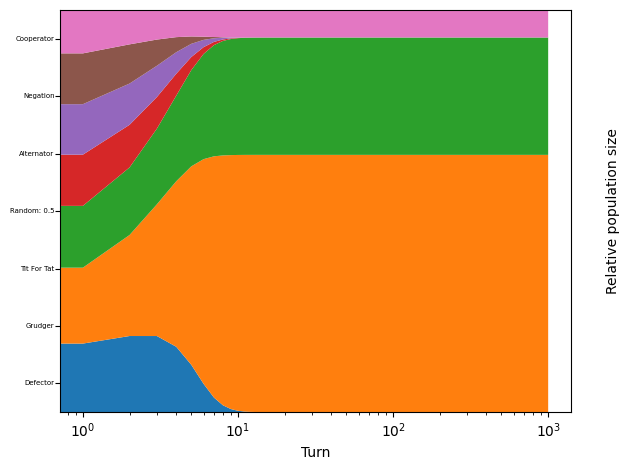

In [259]:
plot = axl.Plot(results)  
stackplot = plot.stackplot(eco)
stackplot.show()

C:\Users\Anshul Jawale\AppData\Local\Temp\ipykernel_6268\3179139329.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  boxplot.show()


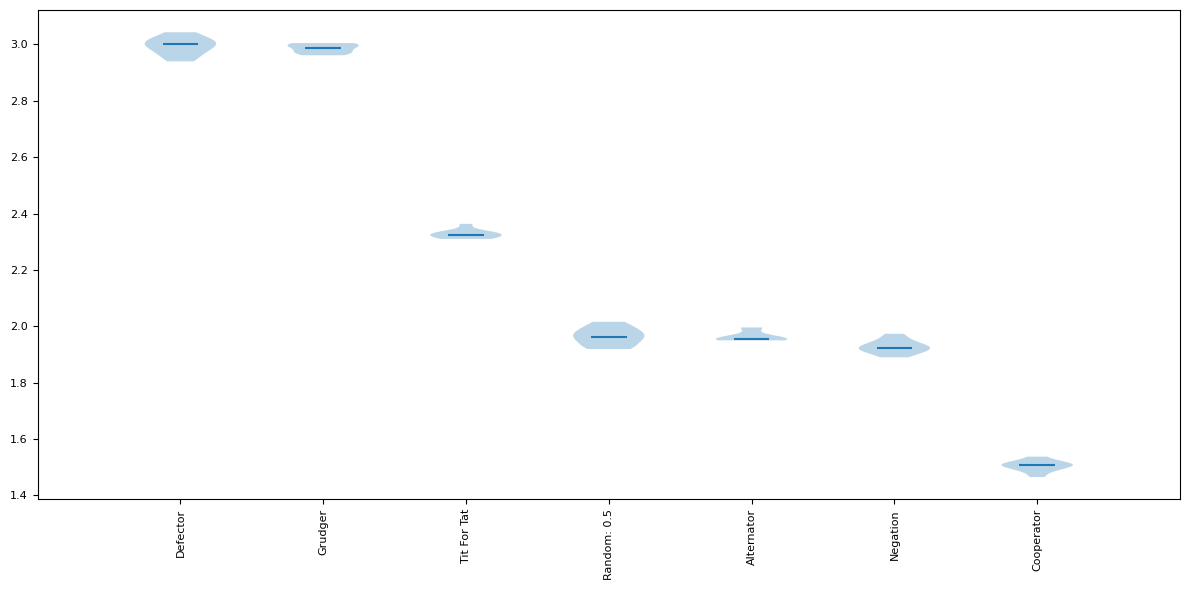

In [260]:
boxplot = plot.boxplot()
boxplot.show()

C:\Users\Anshul Jawale\AppData\Local\Temp\ipykernel_6268\3244706133.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  payoff_map.show()


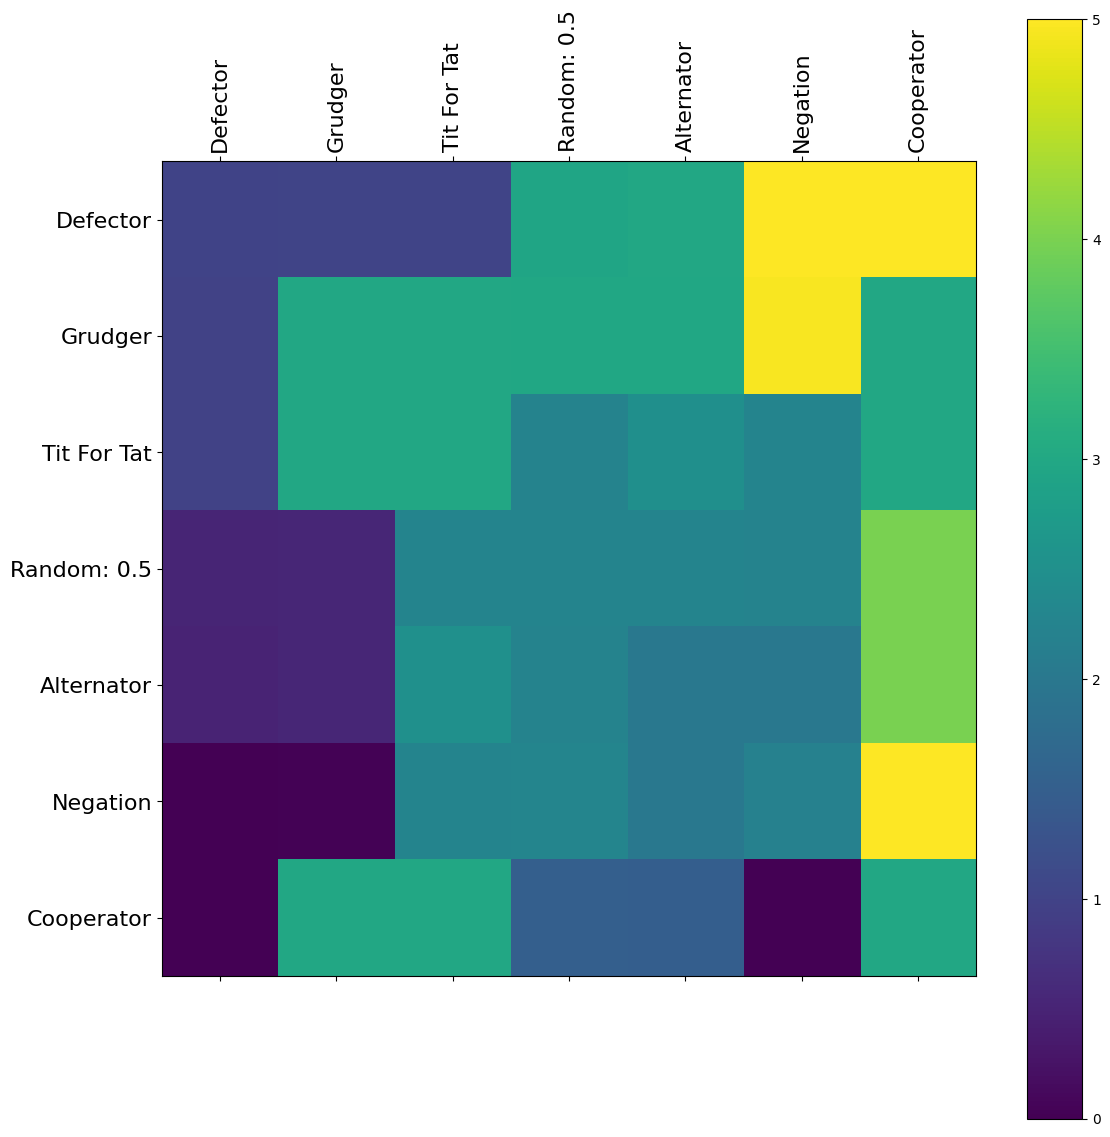

In [261]:
payoff_map = plot.payoff()
payoff_map.show()